In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.ensemble
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV,  RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [3]:
# LOAD DATA 
sales_df = pd.read_csv("C:/Users/manmi/Downloads/sales.csv/sales.csv")

In [89]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  float64
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  float64
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

In [5]:
# Remove spaces, dots, and symbols from column names and format them properly
sales_df.columns = sales_df.columns.str.replace('[^\w\s]', '').str.replace(' ', '_')

# Modify column name: 'Phone No.' -> 'Phone_No'
sales_df.rename(columns={'Phone_No_': 'Phone_No'}, inplace=True)

In [6]:
# Convert 'order_date' to date
sales_df['order_date'] = pd.to_datetime(sales_df['order_date'])

# Convert 'year' to year data type
sales_df['year'] = pd.to_datetime(sales_df['year'], format='%Y').dt.year

# Extract just the month from 'month' column
def extract_month(date_string):
    try:
        date = datetime.strptime(date_string, '%b-%y')
        return date.strftime('%b')
    except ValueError:
        return date_string

sales_df['month'] = sales_df['month'].apply(extract_month)

# Create 'full name' column by concatenating other columns
sales_df['full_name'] = sales_df['Name_Prefix'] + ' ' + sales_df['First_Name'] + ' ' + sales_df['Middle_Initial'] + ' ' + sales_df['Last_Name']

# Drop the specified columns
sales_df = sales_df.drop(['Name_Prefix', 'First_Name', 'Middle_Initial', 'Last_Name','User_Name'], axis=1)

# Convert 'Customer Since' column to datetime
sales_df['Customer_Since'] = pd.to_datetime(sales_df['Customer_Since'])

In [93]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          286387 non-null  float64       
 1   order_date        286392 non-null  datetime64[ns]
 2   status            286392 non-null  object        
 3   item_id           286392 non-null  float64       
 4   sku               286392 non-null  object        
 5   qty_ordered       286392 non-null  float64       
 6   price             286392 non-null  float64       
 7   value             286392 non-null  float64       
 8   discount_amount   286392 non-null  float64       
 9   total             286392 non-null  float64       
 10  category          286392 non-null  object        
 11  payment_method    286392 non-null  object        
 12  bi_st             286392 non-null  object        
 13  cust_id           286392 non-null  float64       
 14  year

In [45]:
# Check for duplicate rows
duplicate_rows = sales_df[sales_df.duplicated()]

# Print the duplicate rows
if len(duplicate_rows) > 0:
    print("Duplicate rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [46]:
# Descriptive statistics
sales_df.describe()

,order_id,item_id,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent
count,2.863870e+05,286387.000000,286387.000000,286387.000000,286387.000000,286387.000000,286387.000000,286387.000000,286387.000000,286387.000000,286387.000000,286387.000000,286387.000000
mean,1.004569e+08,741662.894754,3.011310,851.387557,885.882761,70.040650,815.842111,70047.608463,2020.618771,560849.528484,46.488811,49723.439877,6.069185
std,6.095786e+04,95745.480597,4.573876,1741.759577,2073.264907,256.882946,1983.592084,30243.743684,0.485689,255827.124049,16.673268,27597.274425,10.100156
min,1.003547e+08,574769.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2020.000000,111127.000000,18.000000,210.000000,0.000000
25%,1.004046e+08,659682.000000,2.000000,49.900000,49.900000,0.000000,49.900000,56519.000000,2020.000000,341265.000000,32.000000,26573.000000,0.000000
50%,1.004518e+08,742305.000000,2.000000,119.000000,159.000000,0.000000,149.800000,74225.000000,2021.000000,564853.000000,47.000000,49316.000000,0.000000
75%,1.005134e+08,826121.500000,3.000000,950.000000,910.000000,18.398200,800.000000,92357.000000,2021.000000,781082.000000,61.000000,72645.000000,11.000000
max,1.005624e+08,905208.000000,501.000000,101262.590000,101262.590000,30213.150000,101262.590000,115326.000000,2021.000000,999981.000000,75.000000,99950.000000,75.000000


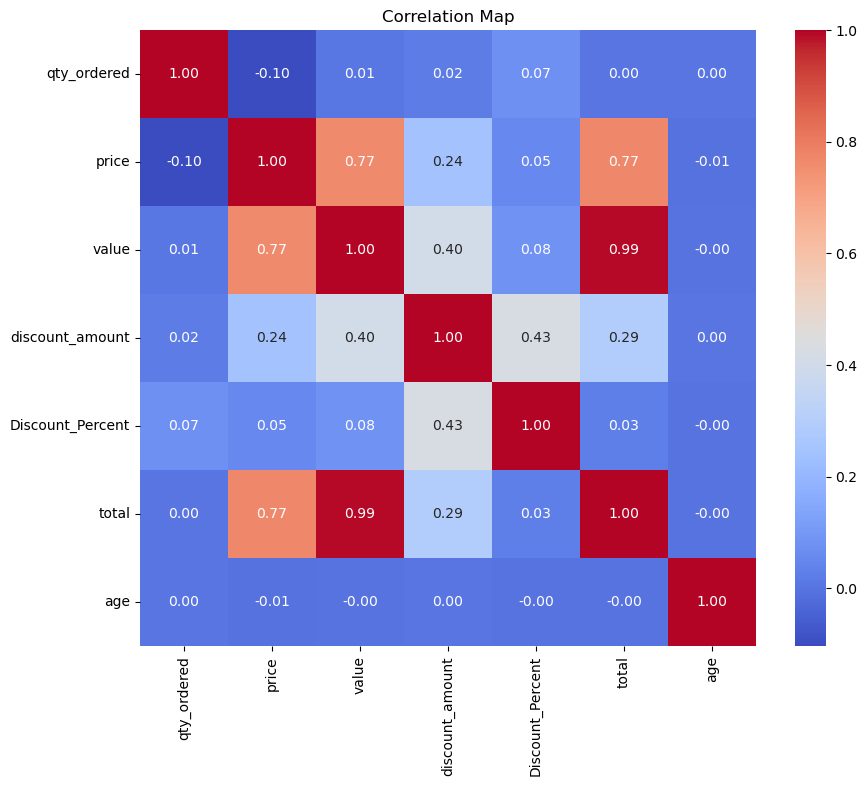

In [7]:
# Correlation map
# Selecting the numerical variables for correlation analysis
numerical_vars = ['qty_ordered', 'price', 'value', 'discount_amount','Discount_Percent', 'total', 'age']

# Creating a correlation matrix
corr_matrix = sales_df[numerical_vars].corr()

# Generating a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Map')
plt.show()

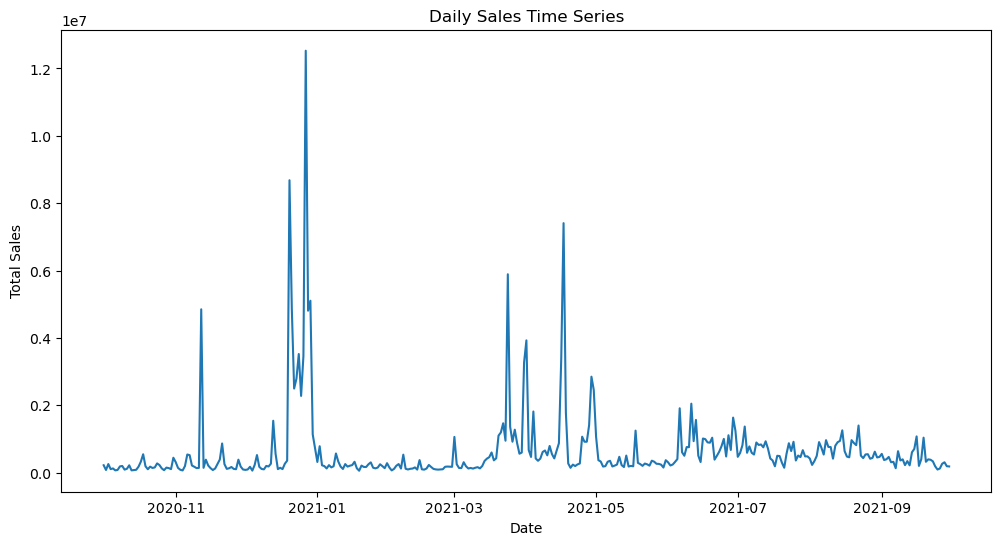

In [48]:
# Daily Sales Time Series
# Convert the 'order_date' column to datetime type
sales_df['order_date'] = pd.to_datetime(sales_df['order_date'])

# Set 'order_date' column as the index of the DataFrame
sales_df.set_index('order_date', inplace=True)

# Resample the data to a daily frequency and calculate the total sales for each day
daily_sales = sales_df['total'].resample('D').sum()

# Plot the daily sales time series
plt.figure(figsize=(12, 6))
plt.plot(daily_sales)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Daily Sales Time Series')
plt.show()

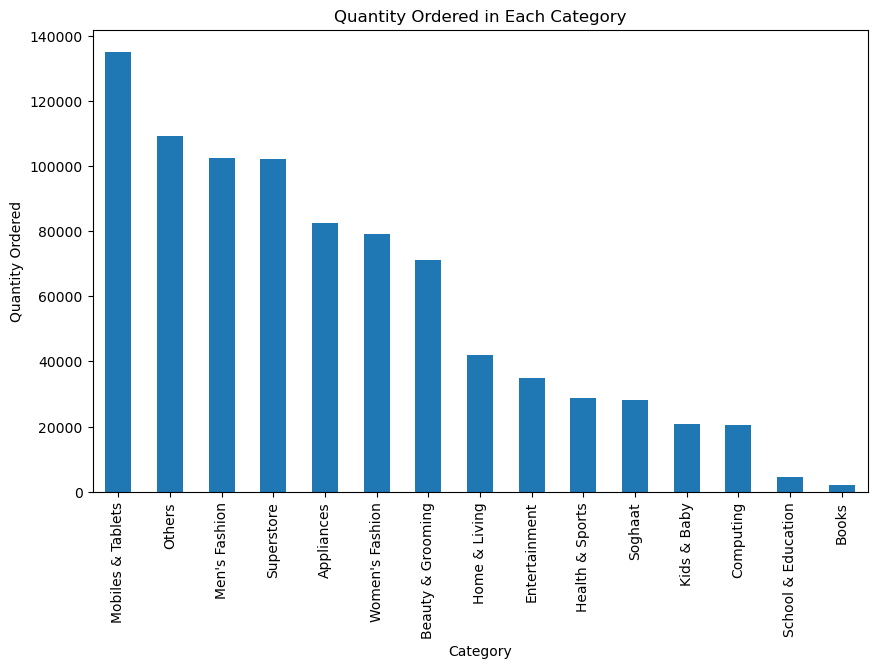

In [49]:
# Quantity Ordered in Each Category
# Group the data by 'category' and calculate the sum of 'quantity_ordered'
category_quantity = sales_df.groupby('category')['qty_ordered'].sum()

# Sort the categories based on total sales in descending order
category_quantity = category_quantity.sort_values(ascending=False)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot
category_quantity.plot(kind='bar', ax=ax)

# Set the x-axis label, y-axis label, and title
ax.set_xlabel('Category')
ax.set_ylabel('Quantity Ordered')
ax.set_title('Quantity Ordered in Each Category')

# Display the plot
plt.show()

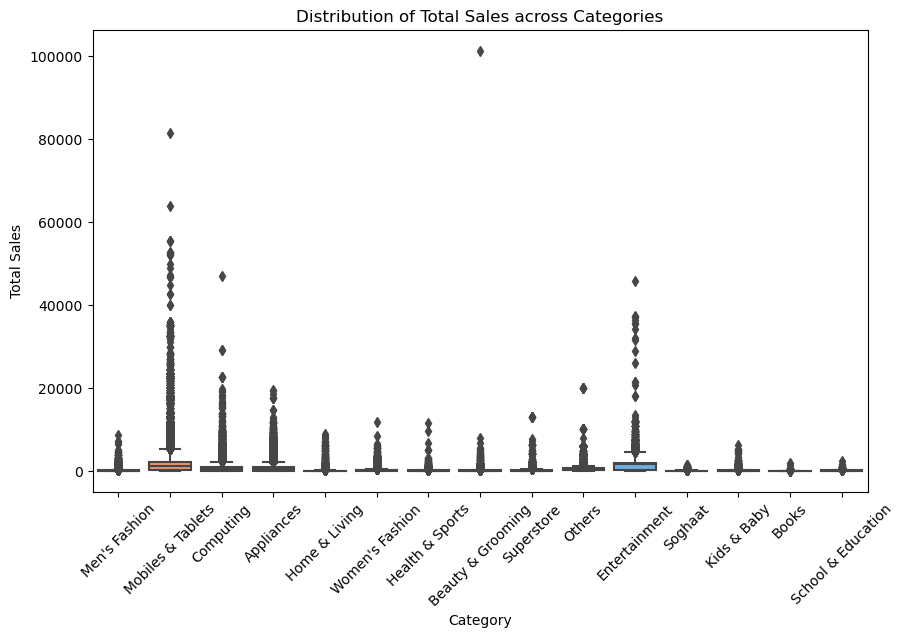

In [50]:
# Distribution of Total Sales across Categories
# Create a box plot to visualize the distribution of total sales across categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='total', data=sales_df)
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Distribution of Total Sales across Categories')
plt.xticks(rotation=45)
plt.show()

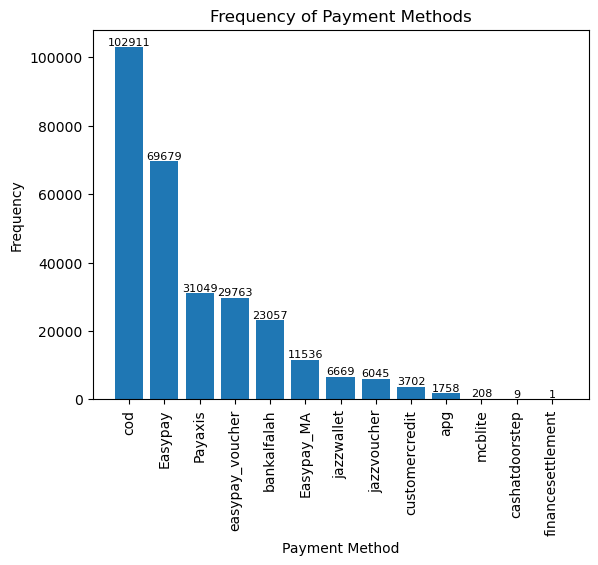

In [51]:
# Frequency of Payment Methods
# Count the frequency of each payment method
payment_counts = sales_df['payment_method'].value_counts()

# Create the bar chart
plt.bar(payment_counts.index, payment_counts.values)

# Set the labels and title
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.title('Frequency of Payment Methods')

# Rotate the x-axis labels if needed
plt.xticks(rotation=90)

# Add labels to the bars
for i, v in enumerate(payment_counts.values):
    plt.text(i, v, str(v), ha='center',va = 'bottom', fontsize = 8)

# Display the bar chart
plt.show()

In [67]:
def plot_feature_importance(importance,names,model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title('FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [111]:
# Decision Tree Regressor
np.random.seed(456)
random.seed(456)

# Select the features and the response variable
X = sales_df[['price', 'qty_ordered', 'discount_amount', 'Discount_Percent']]
y = sales_df['total']

# Split the data into training and testing sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regressor
dt_model = DecisionTreeRegressor()

# Fit the model to the training data
dt_model.fit(X_train_dt, y_train_dt)

# Make predictions on the test data
y_pred_dt_test = dt_model.predict(X_test_dt)

# Calculate the mean squared error (MSE) and root mean squared error (rmse)
mse_dt = mean_squared_error(y_test_dt, y_pred_dt_test)
rmse_dt = np.sqrt(mse_dt)
r2_test_dt = r2_score(y_test_dt, y_pred_dt_test)


print("Mean Squared Error:", mse_dt)
print("Root Mean Squared Error:", rmse_dt)
print("R-squared:", r2_test_dt)

Mean Squared Error: 7011.714736554436
Root Mean Squared Error: 83.73598232871241
R-squared: 0.9981969984193798


Importance of the features 'price' is 66.71%.
Importance of the features 'qty_ordered' is 32.81%.
Importance of the features 'discount_amount' is 0.08%.
Importance of the features 'Discount_Percent' is 0.39%.


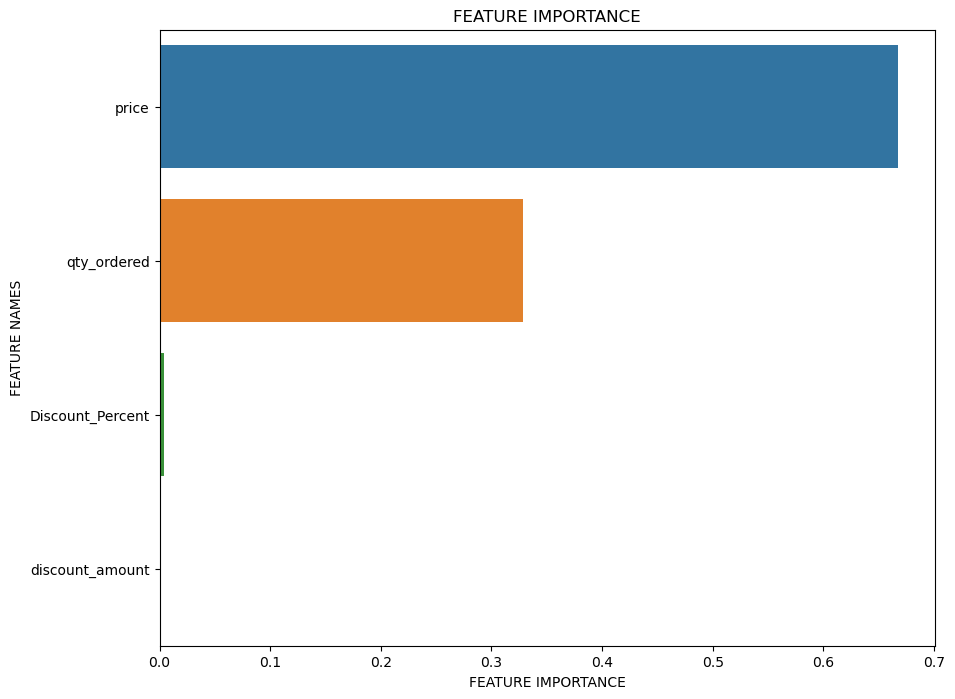

In [101]:
# Feature importance (Decision Tree)
importance = dt_model.feature_importances_
columns = X.columns
i=0

while i<len(columns):
    print(f"Importance of the features '{columns[i]}' is {round(importance[i] * 100, 2)}%.")
    i += 1

plot_feature_importance(importance,columns,dt_model)

In [115]:
# Decision Tree Regressor with hyperparameter tuning
# Define the hyperparameter search space
param_dist = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(estimator=dt_model, param_distributions=param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error')
random_search.fit(X_train_dt, y_train_dt)

# Get the best model and its hyperparameters
best_model_dt = random_search.best_estimator_
best_params_dt = random_search.best_params_

# Make predictions on the testing data using the best model
y_pred_dt_test = best_model_dt.predict(X_test_dt)

# Calculate the mean squared error (MSE) and root mean squared error (RMSE)
mse_dt = mean_squared_error(y_test_dt, y_pred_dt_test)
rmse_dt = np.sqrt(mse_dt)
r2_test_dt = r2_score(y_test_dt, y_pred_dt_test)

print("Best Hyperparameters:", best_params_dt)
print("Mean Squared Error:", mse_dt)
print("Root Mean Squared Error:", rmse_dt)
print("R-squared:", r2_test_dt)

Best Hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Mean Squared Error: 5675.139714457282
Root Mean Squared Error: 75.33352317831208
R-squared: 0.9985406870844213


In [112]:
# Random Forest
np.random.seed(456)
random.seed(456)

# Select the variables to be included in the model
selected_variables = ['price', 'qty_ordered', 'discount_amount', 'Discount_Percent']

# Create the feature matrix with the selected variables
X_rf = sales_df[selected_variables]
y_rf = sales_df['total']

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Train the Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_rf, y_train_rf)

# Make predictions and evaluate the model
y_pred_rf = rf.predict(X_test_rf)
mse = mean_squared_error(y_test_rf, y_pred_rf)
rmse = np.sqrt(mse)
r2_test_rf = r2_score(y_test_rf, y_pred_rf)

print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R-squared:", r2_test_rf)

Mean Squared Error: 3645.3483237964424
Root Mean Squared Error: 60.3767200483468
R-squared: 0.9990626303213034


Importance of the features 'price' is 66.58%.
Importance of the features 'qty_ordered' is 32.95%.
Importance of the features 'discount_amount' is 0.14%.
Importance of the features 'Discount_Percent' is 0.33%.


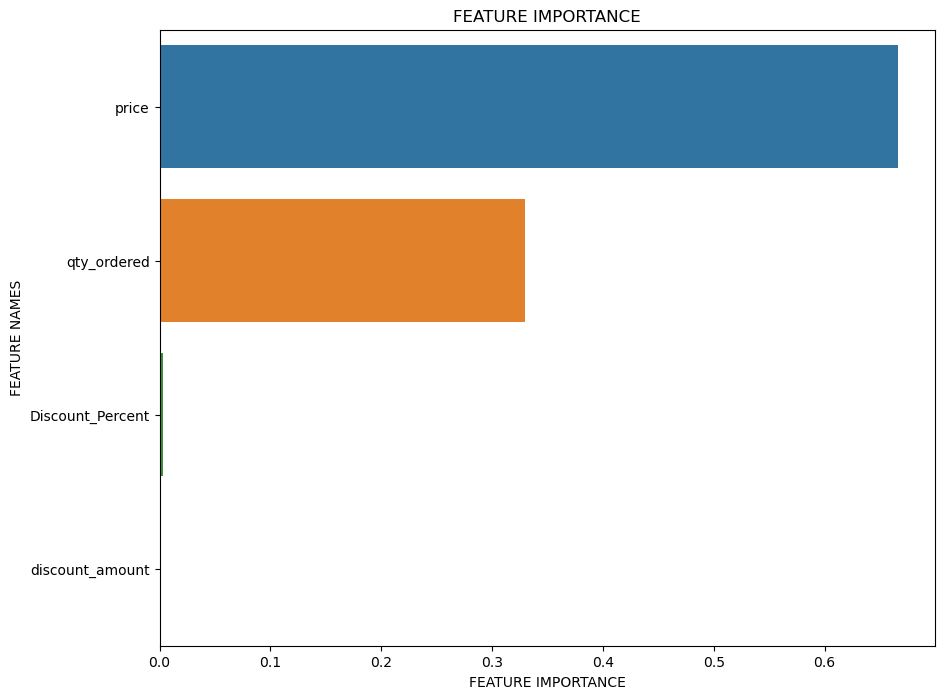

In [98]:
# Feature importance (Random Forest)
importance = rf.feature_importances_
columns = X.columns
i=0

while i<len(columns):
    print(f"Importance of the features '{columns[i]}' is {round(importance[i] * 100, 2)}%.")
    i += 1

plot_feature_importance(importance,columns,rf)

In [113]:
# XGBoost
np.random.seed(456)
random.seed(456)

# Select the features and the response variable
features_xg = ['price', 'qty_ordered', 'discount_amount', 'Discount_Percent']
response_xg = 'total'

# Split the data into training and testing sets
X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(sales_df[features_xg], sales_df[response_xg], test_size=0.2, random_state=42)

# Create an XGBoost regressor
model_xg = xgb.XGBRegressor()

# Fit the model to the training data
model_xg.fit(X_train_xg, y_train_xg)

# Make predictions on the testing data
y_pred_xg = model_xg.predict(X_test_xg)

# Calculate the mean squared error (MSE)
mse_xg = mean_squared_error(y_test_xg, y_pred_xg)
rmse_xg = np.sqrt(mse_xg)
r2_test_xg = r2_score(y_test_xg, y_pred_xg)

print("Mean Squared Error:", mse_xg)
print("Root Mean Squared Error:", rmse_xg)
print("R-squared:", r2_test_xg)

Mean Squared Error: 1800.6149090501906
Root Mean Squared Error: 42.4336530250483
R-squared: 0.9995369875060404


Importance of the features 'price' is 49.29%.
Importance of the features 'qty_ordered' is 48.78%.
Importance of the features 'discount_amount' is 0.66%.
Importance of the features 'Discount_Percent' is 1.27%.


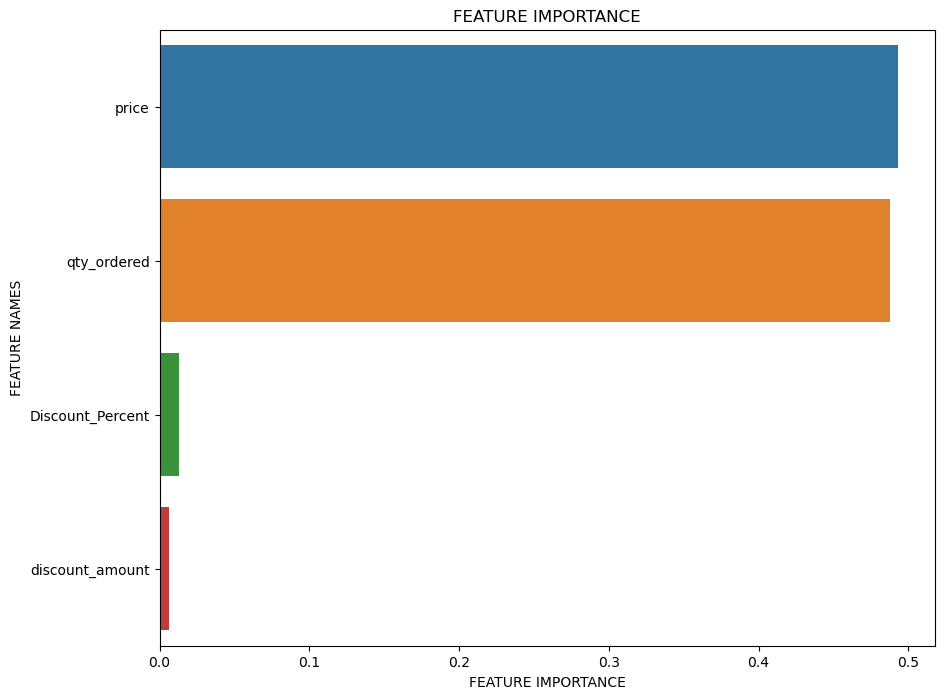

In [106]:
# Feature importance (XGBoost)
importance = model_xg.feature_importances_
columns = X.columns
i=0

while i<len(columns):
    print(f"Importance of the features '{columns[i]}' is {round(importance[i] * 100, 2)}%.")
    i += 1

plot_feature_importance(importance,columns,model_xg)

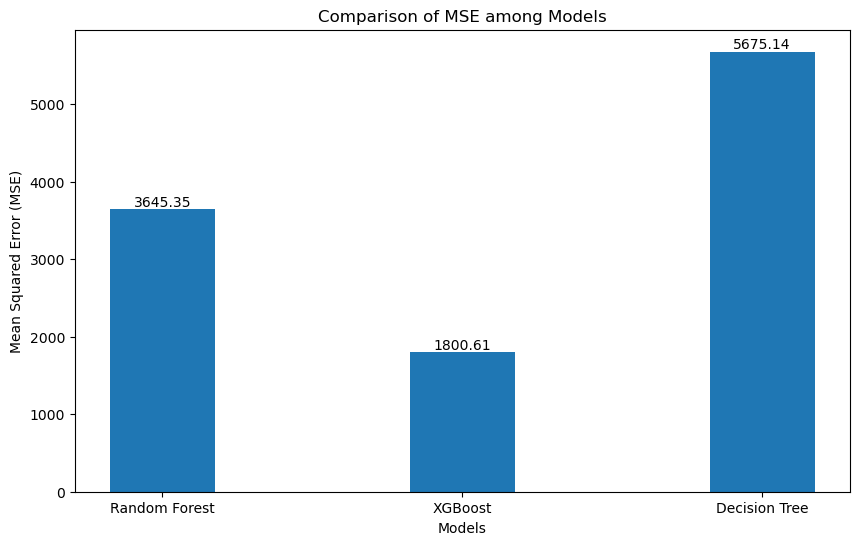

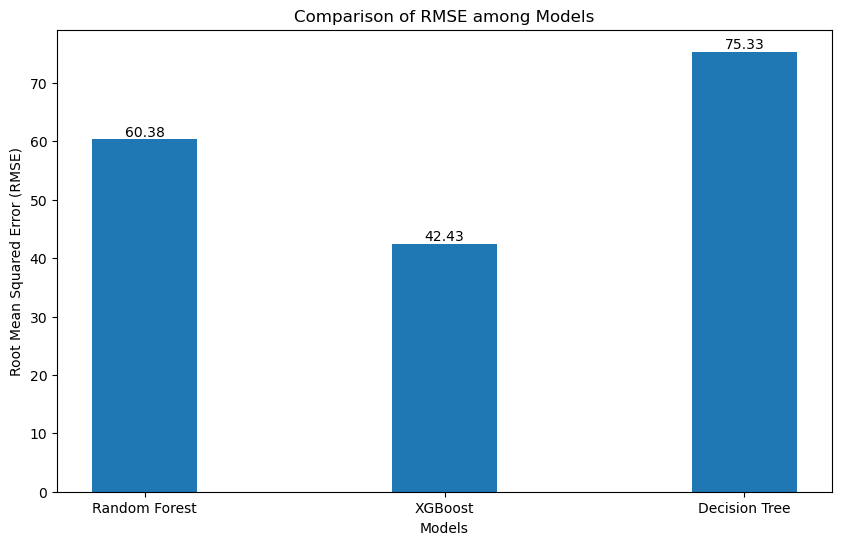

In [123]:
# Comparison of models
# Define the evaluation metrics for each model
models = ['Random Forest', 'XGBoost', 'Decision Tree']
mse_scores = [mse, mse_xg, mse_dt]
rmse_scores = [rmse, rmse_xg, rmse_dt]

# Set the width of the bars
bar_width = 0.35

# Set the x positions of the bars
r = range(len(models))

# Plot the MSE scores
plt.figure(figsize=(10, 6))
plt.bar(r, mse_scores, width=bar_width, label='MSE')

# Set the x-axis labels and title
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE among Models')

# Set the tick labels
plt.xticks(r, models)

# Add labels to the bars with rounded values
for i, value in enumerate(mse_scores):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Show the plot
plt.show()

# Plot the RMSE scores
plt.figure(figsize=(10, 6))
plt.bar(r, rmse_scores, width=bar_width, label='RMSE')

# Set the x-axis labels and title
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Comparison of RMSE among Models')

# Set the tick labels
plt.xticks(r, models)

# Add labels to the bars with rounded values
for i, value in enumerate(rmse_scores):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Show the plot
plt.show()
